# Path of Exile game stats data eda

dates: 2022.04.26 ~ 

This file contains an analysis processing of the game 'Path of Exile' data.

###### Origins of datas from here: 
poe_stats : https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic

Data contains stats of 59000 players, from 4th August of 2017 and before now.

---

This file made for EDA after altering the original data. (about class and rank)

본격적인 EDA는 이 파일에서 시작하려고 합니다. 첫 EDA 주제는 ladder(game mode)에 따라 분석을 하는 것이며, 

15,000 등 안에 드는 이 랭커들의 class나 경험치, 혹은 직업과 경험치를 함께 살펴보는 등 랭커 분석 자체를 목적으로 예정입니다.

그 다음 전체적인 분석과 각 게임 모드 별로, 그리고 한 사람이 여러 계정을 쓰는 경우 등등 유저 자체와 관련한 부분을 앞으로 볼 계획에 있습니다.

--- 

각 단계별로 진행 후 한 파일로 합쳐서 관리해 둘 예정입니다.

# Dataset and libraries 

## data and libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

df = pd.read_csv('poe_stats_2revisedrank.csv')

In [2]:
df

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder,special_class,stat_Str,stat_Int,stat_Dex,stats_num
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger,1,0,1,0,1
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC,1,0,1,0,1
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger,1,0,1,0,1
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger,1,1,0,1,2
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59771,14904,True,False,ПроклятьеРекласта,89,Necromancer,d33b4f6e08c10e365765f9a36a8f36d561fd1d86f10ee1...,1786695653,Romanchik002,18,romanchik002,Hardcore Harbinger,1,0,1,0,1
59772,14918,False,False,IshibashiSummoner,94,Necromancer,5764cfa387e0a87a4bebc1a3c5017e92de8bbb06445c47...,2720770853,Ishibashisan,33,NaN,Harbinger,1,0,1,0,1
59773,14981,False,False,BLively,73,Slayer,9ac75ab75a47cee8a9dfb0a31912df8909720a8b20f9f1...,495034029,ruby01,19,NaN,SSF Harbinger,1,1,0,1,2
59774,14905,False,False,vawddvaw,89,Gladiator,cf02dfc0c90b2df9c7ac76bbedd91e93c2a8a2ca629c15...,1786638972,Lecarn,24,lecarn,Hardcore Harbinger,1,1,0,1,2


In [3]:
df.shape

(59776, 17)

In [4]:
df.sample(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder,special_class,stat_Str,stat_Int,stat_Dex,stats_num
20697,5162,False,False,GarciaNoren,96,Slayer,b7b4373fc3afae05ae6a47e1a57b5929941041b143f4b0...,3114846779,bonvoyage2015,40,bonvoyage209,Harbinger,1,1,0,1,2
46545,11609,False,False,ParksAndRecAdmin,90,Slayer,455f256fccc2f5e267e751de8470cca2bbe7534d49ae8c...,1934042685,DBowd3n,19,dbowden,Hardcore Harbinger,1,1,0,1,2
19159,4800,False,False,FieryDiaom,87,Necromancer,bf9c59ec58c2993624afe54a6b6e2a3cca776133d8d8dc...,1519376233,vammatar,36,NaN,SSF Harbinger,1,0,1,0,1
27755,6954,False,False,DeafBat,84,Assassin,3c0f4fa918a9a10c22e41040f8f45560fb8ada2c636ebb...,1208946273,PotatoLeaf,23,NaN,SSF Harbinger,1,0,1,1,2
55784,13973,True,False,WinterSlave,55,Elementalist,6d6a6d0cf506c3879cae18b527ee76f855a73e0661c6af...,96282180,Gravedyard,11,NaN,SSF Harbinger HC,1,0,1,0,1
24228,6069,False,False,Kharantukii,74,Chieftain,0570748a5f8eacc77454535d70ec9d96ae0c2e2456a4e8...,521783385,Antaiseito,12,NaN,SSF Harbinger HC,1,1,0,0,1
17343,4345,False,False,ConanSSF,87,Berserker,b62b5f5424cb09b204d667d0b3494204876d76e849600f...,1559985096,ShadowPulse,20,NaN,SSF Harbinger,1,1,0,0,1
54780,13719,True,False,kotlecio,56,Gladiator,bba861c82d8ca3b5761c5df5ba56223027f7b6e930589a...,101760443,kotlecio,16,NaN,SSF Harbinger HC,1,1,0,1,2
54665,13634,True,False,Cirno_Brigade,89,Gladiator,9dbfa675b88f157d0944db8ac36c8914ac81710566d8d0...,1834657971,KamisamaLolz,21,NaN,Hardcore Harbinger,1,1,0,1,2
42400,10578,False,False,SCRUFFY_WAND,90,Pathfinder,58da38170ecb83f8a5535d7c7a73c508906ecf4281d3d1...,1963267575,Misterscruffy,29,NaN,Hardcore Harbinger,1,0,0,1,1


## data describes

이루어진 컬럼들, 그리고 간단한 통계량 살펴보기

In [5]:
# columns name

df.columns

Index(['rank', 'dead', 'online', 'name', 'level', 'class', 'id', 'experience',
       'account', 'challenges', 'twitch', 'ladder', 'special_class',
       'stat_Str', 'stat_Int', 'stat_Dex', 'stats_num'],
      dtype='object')

In [6]:
df.describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,59776.000000,59776.000000,5.977600e+04,59776.000000,59776.000000,59776.000000,59776.000000,59776.000000,59776.000000
mean,7472.536386,85.422578,1.825786e+09,25.759569,0.991702,0.582207,0.418027,0.513450,1.513684
std,4314.060306,11.288017,1.094748e+09,8.440888,0.090713,0.493200,0.493239,0.499823,0.614134
min,1.000000,53.000000,7.790982e+07,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3736.750000,78.000000,7.774697e+08,19.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,7472.500000,90.000000,1.934010e+09,25.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,11208.250000,95.000000,2.876117e+09,33.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,14981.000000,100.000000,4.250334e+09,40.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.describe(include='object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


## describe result understanding

##### 1. rank
rank가 이루어진 순위는 15000이나 50%에 7472로 있는 것을 볼 수 있다. 

rank의 빈 곳을 일부 채워 넣었기 때문이며, rank max 값 또한 15000이었으나 14981로 수정되어있다.

##### 2. level
이들의 평균 level 은 85이다. 최대 level이 100이지만 대부분 숙련자라는 뜻이며, 이들 중 50%에 해당하는 랭커들이 90레벨 이상이다. 또한 그들 중 25%에 해당하는 사람들이 95레벨 이상이었다. 

*(레벨은 경험이 많은 유저일 수록 레벨이 높고, 그들이 상위 랭크에 올라가있을 확률또한 높으며, 게임이 오래될 수록 신규 유저의 유입은 줄어들어서 전체 유저들의 평균 레벨 자체가 올라가기 때문에 크게 의미를 두지 않을 생각이다.)*

##### 3. exp
경험치는 레벨 자체와 비슷하게 여길 수 있으나 평균이 1.825786e+09, 50%가 1.934010e+09, max값이 4.250334e+09 이다.

그러나 표준편차가 1.094748e+09이다. 가장 작은 값은 7.790982e+07 인데 이와 비교해보기만 해도 상당히 큰 표준편차인 것을 확인할 수 있다.

최소 레벨이 53임을 함께 견주어 볼때, 일반적인 RPG가 그렇듯 레벨이 올라갈 수록 경험치를 더 많이 쌓아야 레벨을 올릴 수 있음을 예상해 볼 수 있는 부분이다. 

##### 4. challenges
도전 횟수로 생각이 된다. 해당 게임 모드를 몇 번을 수행을 했는지에 대한 것으로 생각된다. 적은 사람은 4번이지만 많은 사람은 40번이며,

이 15000등 안에 드는 사람들은 평균적으로 25회 정도 시도한 사람들이었다는 것을 확인할 수 있다.

##### 5. 'special_class', 'stat_Str', 'stat_Int', 'stat_Dex', 'stats_num'
이 부분은 임의로 내가 넣은 부분으로, 클래스를 스탯으로 나누어 쉽게 구분할 수 있도록 만들었다. 

직업 자체도 직업 자체지만, 해당 스킬을 찍기 위해 스탯을 올린다던지, 그렇게 올린 스탯을 더 잘 활용하기 위해 직업을 선택했을 수 있는 부분이 보였기 때문이다.

##### 6. name
비슷한 이름을 쓰는 경우가 많은 가보다. '_Flic_' 이라는 이름이 등장한 것은, 인기있는 이름이었거나 혹은 동일 유저가 많은 계정을 썼을 수도 있다.

확실한 건 이 게임은 같은 닉네임을 허용하는 게임인 것이라는 점이다.

##### 7. class
19개 의 전직 클래스와 7개의 전직 이전 클래스 총 26개가 보인다.

가장 많이 등장한 직업은 스탯 중 힘만 찍는 Marauder 계열의 'Berserker'이고 총 8711 번 등장한다고 한다.

##### 8. id and account
id는 unique 하다. 게임 내에서 캐릭터가 구분되어야 하기 때문일 것이다. 하지만 한 계정이 최대 30번 등장한다. 계정당 만들 수 있는 캐릭터가 제한이 없...나? (게임마다 캐릭터 슬롯을 확장하는 데에 현금을 요구하기도 하기 때문에 이해하지만 30개라니. 다양한 스탯으로 다양한 직업을 할 수 있는 점에서 수긍은 가는 부분.)

30개를 만든 사람은 바로 'chuz101'이라는 유저이다.

재미있는 부분은 6만 여개에 이르는 랭커 순위에서, 사실 unique account, 즉 실제 유저 자체는 6만 여명이 아니라 37123명인 점이다. 

그리고 이 또한 같은 사람이 여러 account를 쓸 가능성도 있기 때문에 실제 랭커는 더욱 줄어들 수 있다. (twitch 아이디로 찾아보면 나오겠지...?)

##### 9. twitch
유일하게 null 값이 있었던 컬럼이다. 실시간 스트리밍을 했는지 안했는지는 모르지만 해당 유저가 자신의 트위치 아이디를 등록을 했는지 안했는지에 따라 나오는 것으로 보인다. 

정확한 사실을 알면 더 좋겠지만, 이 컬럼 자체로 이 사람이 스밍을 하는 트위치 유저였는지 아니면 입력하래서 가지고 있는 트위치 계정을 입력했을 뿐인지는 큰 차이이기 때문에 동일 유저를 판별하는 부분에서만 사용할 수 있을 것으로 생각된다.

위에 계정 개수를 생각했을 때 유니크값이 9613개인 것을 보면 랭커 4명중 1명은 트위치 계정을 갖고있다.

그리고 총 16300 레코드가 기록되어 있으므로 같은 유저의 다 계정이 확실시 되는 부분이다.

'thespunkylobster' 라고 성급한 바닷가재라는 사람이 총 18번 등장했다고 한다.

##### 10. ladder
이전에 자세히 다루었던 부분이지만, 이 데이터를 크게 구분짓는 줄기라고 생각된다. 왜냐하면 게임모드이고, 게임모드의 난이도나 파티플레이 가능 여부는 게임 플레이에서 큰 영향을 끼친다.

숙련되지 않은 사람을 버스태울(!)수도 있고, 클래스별로 분포도 갈릴 것이다. 이후 자세히 볼 예정이다.

---

*분석의 목적을 정확히 정하고 싶지만 이 게임에서 랭킹에 드는 기준조차 제대로 모르기 때문에, 랭커들의 직업이나 특성들을 찾아보는 것을 주 목적으로 하되, 데이터로 게임(맥락)을 이해할 수 있을지 궁금한 부분도 있어서 최대한 많은 생각을 하면서 분석을 진행하려 한다.*

In [8]:
df.nunique()

rank             14981
dead                 2
online               2
name             58286
level               48
class               26
id               59776
experience       54124
account          37123
challenges          37
twitch            9613
ladder               4
special_class        2
stat_Str             2
stat_Int             2
stat_Dex             2
stats_num            3
dtype: int64

In [9]:
df.isnull().sum()

rank                 0
dead                 0
online               0
name                 0
level                0
class                0
id                   0
experience           0
account              0
challenges           0
twitch           43476
ladder               0
special_class        0
stat_Str             0
stat_Int             0
stat_Dex             0
stats_num            0
dtype: int64

## correlation  

큰 의미 없을 것으로 알지만 확인해보는 correlation.

In [10]:
df.corr()

,rank,dead,online,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
rank,1.000000,0.042806,-0.040726,-0.455572,-0.434158,-0.259144,-0.093509,0.000760,0.017367,-0.013329,0.003710
dead,0.042806,1.000000,-0.085765,-0.333407,-0.311168,-0.210822,-0.058308,0.067506,0.081561,-0.054757,0.075153
online,-0.040726,-0.085765,1.000000,0.082778,0.105385,0.062610,0.008045,-0.030884,-0.026918,0.023961,-0.026920
level,-0.455572,-0.333407,0.082778,1.000000,0.924060,0.597135,0.180117,-0.019952,-0.142386,0.074450,-0.069787
experience,-0.434158,-0.311168,0.105385,0.924060,1.000000,0.658386,0.126949,-0.048501,-0.158123,0.089964,-0.092728
challenges,-0.259144,-0.210822,0.062610,0.597135,0.658386,1.000000,0.114611,-0.051287,-0.110972,0.085180,-0.060989
special_class,-0.093509,-0.058308,0.008045,0.180117,0.126949,0.114611,1.000000,0.002159,-0.030158,0.016113,-0.009373
stat_Str,0.000760,0.067506,-0.030884,-0.019952,-0.048501,-0.051287,0.002159,1.000000,-0.301089,-0.162677,0.428866
stat_Int,0.017367,0.081561,-0.026918,-0.142386,-0.158123,-0.110972,-0.030158,-0.301089,1.000000,-0.268728,0.342638
stat_Dex,-0.013329,-0.054757,0.023961,0.074450,0.089964,0.085180,0.016113,-0.162677,-0.268728,1.000000,0.467396


<AxesSubplot:>

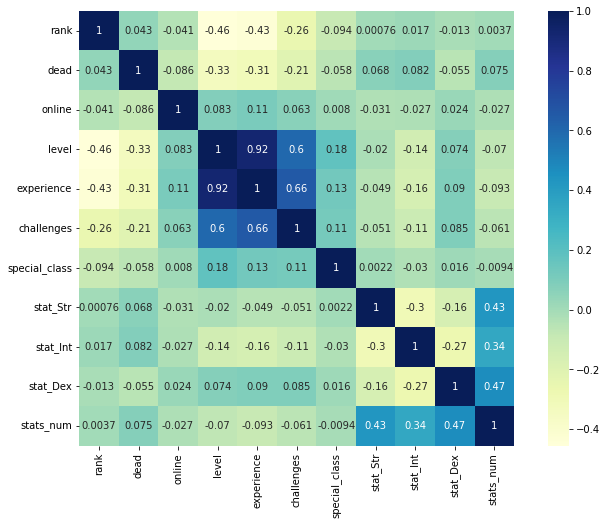

In [11]:
plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", square = True)

## plan...

큰 줄기는 아래처럼 나눌 수 있을 것으로 생각된다.

1. by ladder or not : 게임모드 별 차이
2. class : 클래스 별 차이
3. some users who freqently haunting : 다 캐릭터 혹은 다 계정 유저의 위치 등



# distribution checking

## level and exp

/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


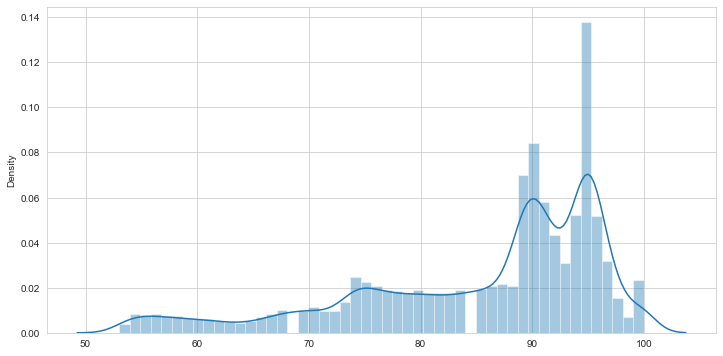

In [12]:
# level

plt.rcParams["figure.figsize"] = (12, 6)
sns.set_style('whitegrid')
sns.distplot(x = df['level'])
plt.show()

/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


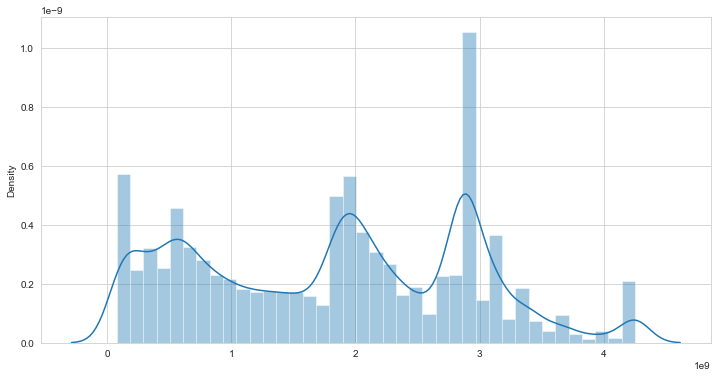

In [13]:
# exp

plt.rcParams["figure.figsize"] = (12, 6)
sns.set_style('whitegrid')
sns.distplot(x = df['experience'])
plt.show()

# try: No ladder division

## dead or not 

<AxesSubplot:>

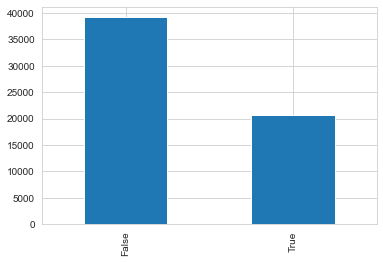

In [14]:
# 살았다면 거짓이오, 죽었다면 참이로ㄷr...

plt.rcParams["figure.figsize"] = (6, 4)
df['dead'].value_counts().plot.bar()

In [15]:
# 산 자

df[df['dead'] == False].describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,39195.000000,39195.000000,3.919500e+04,39195.000000,39195.000000,39195.000000,39195.000000,39195.000000,39195.000000
mean,7338.720475,88.149713,2.072630e+09,27.049062,0.995535,0.558081,0.388876,0.533282,1.480240
std,4336.364038,9.142814,1.079020e+09,8.495187,0.066671,0.496621,0.487501,0.498897,0.609736
min,1.000000,53.000000,7.790982e+07,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3566.000000,82.000000,1.066271e+09,21.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,7276.000000,91.000000,2.100171e+09,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,11086.000000,95.000000,2.888393e+09,36.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,14981.000000,100.000000,4.250334e+09,40.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
df[df['dead'] == False].describe(include = 'object')

,name,class,id,account,twitch,ladder
count,39195,39195,39195,39195,10250,39195
unique,39164,26,39195,29790,7590,4
top,Rodrick_Harbinger_SSF,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,Hyperized,yoshixt,SSF Harbinger
freq,4,6090,1,25,11,14981


In [17]:
# 숨진 자

df[df['dead'] == True].describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,20581.000000,20581.000000,2.058100e+04,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000,20581.000000
mean,7727.378942,80.228949,1.355689e+09,23.303824,0.984403,0.628152,0.473544,0.475681,1.577377
std,4259.756661,13.029031,9.625968e+08,7.765493,0.123913,0.483310,0.499312,0.499420,0.617451
min,4.000000,53.000000,7.791455e+07,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4094.000000,69.000000,3.593047e+08,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,7820.000000,88.000000,1.678814e+09,23.000000,1.000000,1.000000,0.000000,0.000000,2.000000
75%,11489.000000,91.000000,2.106732e+09,28.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,14971.000000,100.000000,4.250334e+09,40.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
df[df['dead'] == True].describe(include = 'object')

,name,class,id,account,twitch,ladder
count,20581,20581,20581,20581,6050,20581
unique,19414,26,20581,10951,3240,2
top,_Flic_,Necromancer,dae26ebd7582552ba5330897c98409644cbbd35d3a879c...,HQuality,turbofreddy1,SSF Harbinger HC
freq,14,2712,1,29,15,11136


## 죽음과 다른 컬럼과의 관계

### 클래스별 숨짐 여부

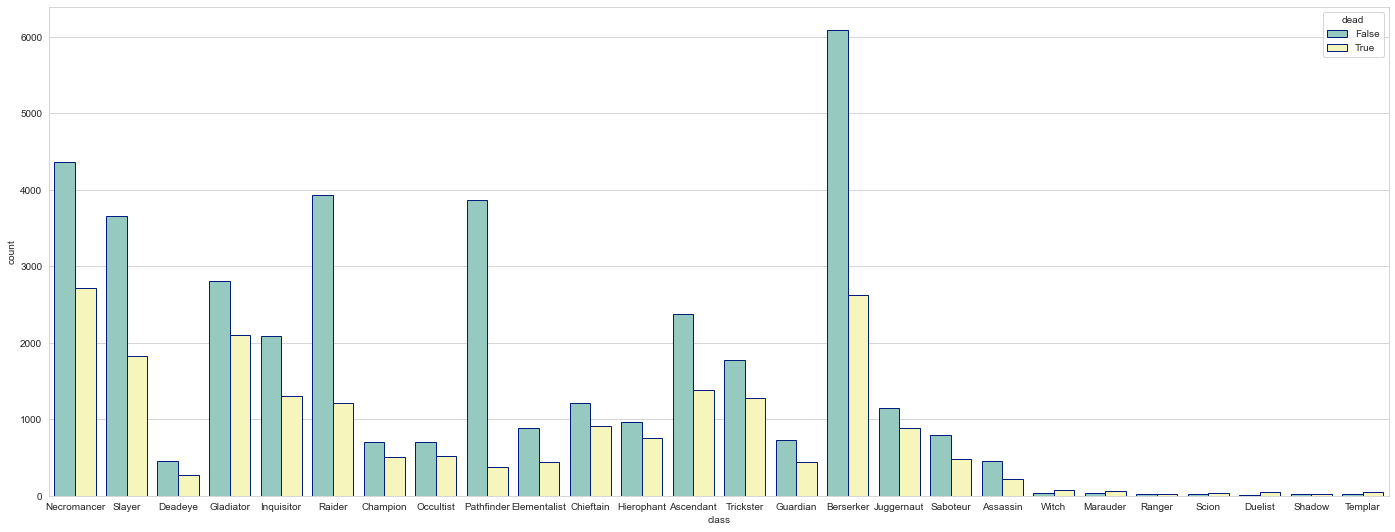

In [19]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'class', 
              hue = 'dead', 
              palette="Set3", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

### 랭크 구간 별 숨짐 여부

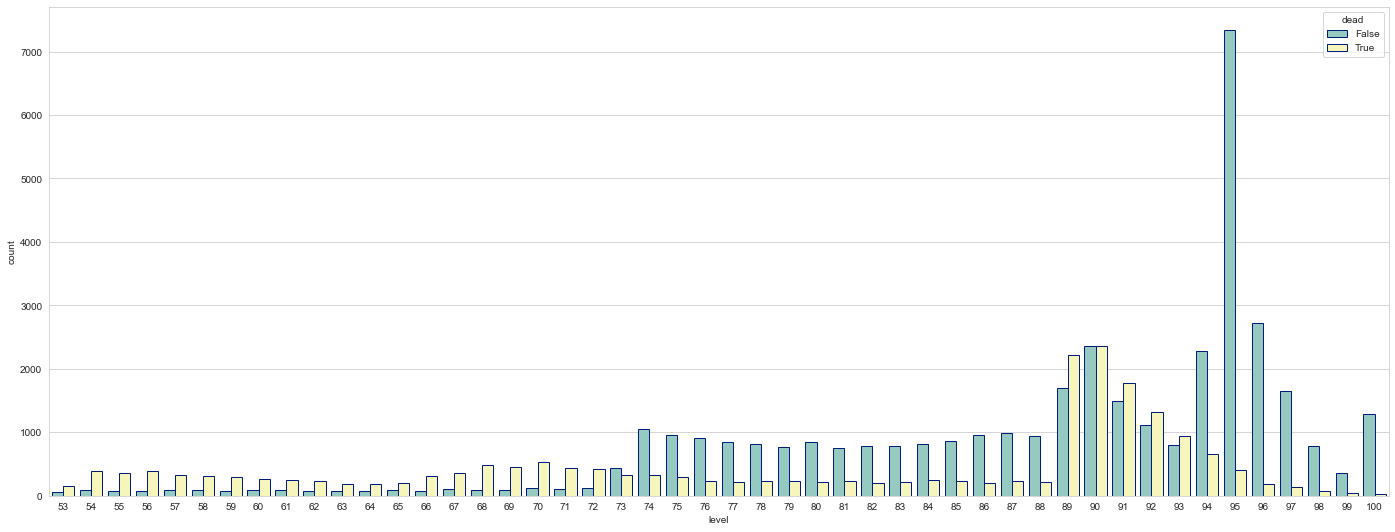

In [20]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'level', 
              hue = 'dead', 
              palette="Set3", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

### 죽음과  클래스 전직과의 관계

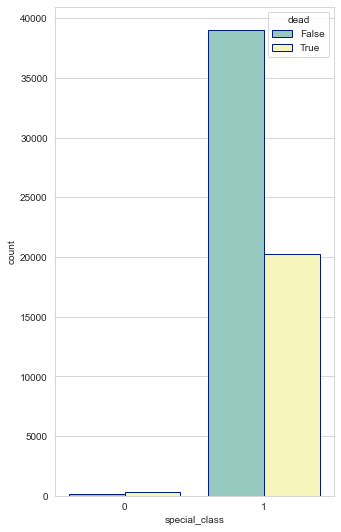

In [21]:
plt.rcParams["figure.figsize"] = (5, 9)
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'special_class', 
              hue = 'dead', 
              palette="Set3", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

### 게임모드에 따라 죽음 상태 비율

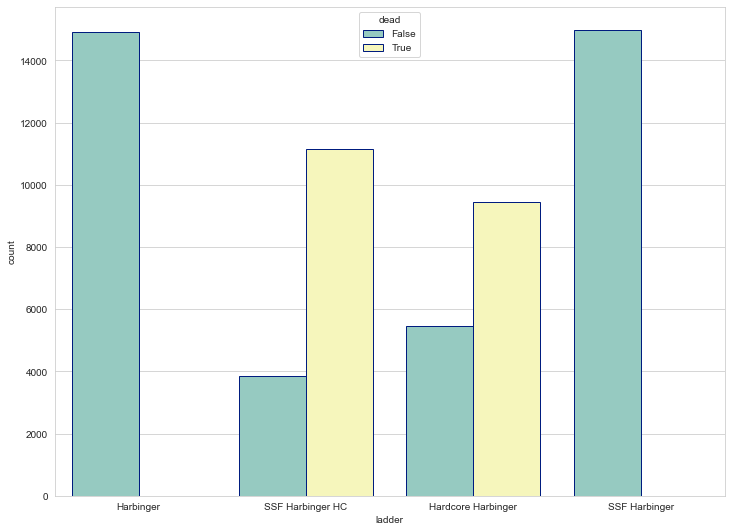

In [22]:
plt.rcParams["figure.figsize"] = (12, 9)
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'ladder', 
              hue = 'dead', 
              palette="Set3", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

In [23]:
# 일반 모드에서는 정말 죽음이 없는 걸까?

df[(df['ladder'] == 'Harbinger')|(df['ladder'] == 'SSF Harbinger')]['dead'].value_counts()

False    29899
Name: dead, dtype: int64

### Point

분석에서 가장 중요한 부분이었는데 놓치고 있었다. 하드코어 모드에서만 죽음이 존재했고 일반 모드에서는 죽음이 없었다.

사실 ``` df[df['dead'] == True].describe(include = 'object') ``` 부분만 보고 알았어야 하는 것이다.

일반 모드에서는 엔딩이라는 개념이 없고 하드코어 모드는 클리어의 개념이 있는 상태일 수도 있다는 생각.

그렇다면 'ladder'에 따라 분석해야하는 큰 이유가 생겼다. 하드코어 모드로 가르거나, 솔로-파티 모드 로 나누어서 분석해야할 것이다.

게임을 잘 이해하고 있었다면 없었을 시행착오이지만 이렇게 찾아가는 것도 재미인 것 같다.

# try: with ladder division (HC or not)

## Non Hardcore mode - nobody dead

In [24]:
non_hc = df[(df['ladder'] == 'Harbinger')|(df['ladder'] == 'SSF Harbinger')]

In [25]:
non_hc.describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,29899.000000,29899.000000,2.989900e+04,29899.000000,29899.000000,29899.000000,29899.000000,29899.000000,29899.000000
mean,7475.283187,89.368675,2.189977e+09,27.797518,0.997391,0.538346,0.357102,0.559484,1.454932
std,4315.678567,7.768666,1.074247e+09,8.579464,0.051010,0.498536,0.479153,0.496457,0.604076
min,1.000000,73.000000,4.950340e+08,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3738.000000,83.000000,1.130943e+09,21.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,7475.000000,94.000000,2.727023e+09,28.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,11212.500000,95.000000,2.932831e+09,36.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,14981.000000,100.000000,4.250334e+09,40.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [26]:
non_hc.describe(include='object')

,name,class,id,account,twitch,ladder
count,29899,29899,29899,29899,7125,29899
unique,29882,26,29899,23098,5442,2
top,Rodrick_Harbinger_SSF,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,Hyperized,fernqvist,SSF Harbinger
freq,4,5003,1,25,9,14981


non Hardcore mode에서의 평균 레벨은 전체보다 +4정도 되는 것으로 나타났다. 

> 어려운 모드라고 해서 도전하는 사람들의 레벨이 특별히 더 높은 것은 아닐 수 있다. 하지만 함정은 만렙이 100이고 전체 렝커중 가장 낮은 레벨이 58이었던 점을 잊으면 안된다. 
> 만약 HC모드에 도전한 사람들의 전체 수와 일반 모드의 전체 수를 비교할 수 있다면 (만약 일반 모드의 전체 도전자수가 유의미할 정도로 많게 나타난다면) 평균 레벨 차이가 의미가 크지않음을 좀 더 잘 설명할 수 있을 것 같다.

challenge는 전체에서보다 +2~3 회 정도 더 되는 것으로 나타났다. 

> 아마도 HC모드는 죽음이 있기 때문에 한계를 바로 체감할 수 있기 때문에, 상대적으로 도전하기를 포기하는 경우가 더 있을 것이라는 생각이다. 
> 하지만 이 또한 랭커들이기 때문에 차이가 크게 유의미할 것이라고는 생각하지 않으며, 이 숫자 자체만으로 '랭커들은 기록을 세우는데 이정도 도전을 했다고' 얘기할 수 있는 정도로 생각된다.


## correlation map

<AxesSubplot:>

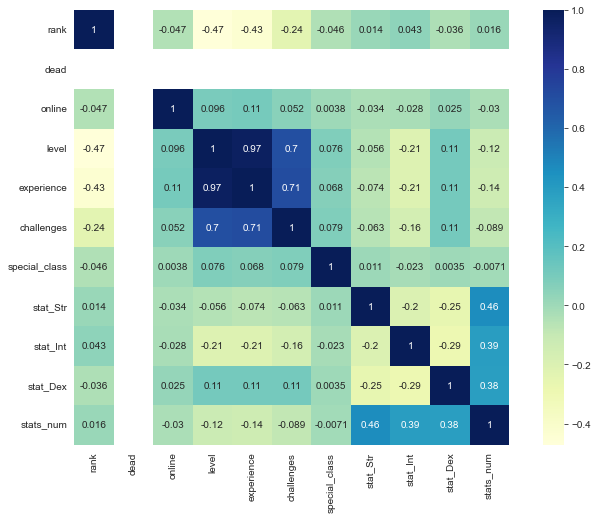

In [27]:
plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(non_hc.corr(), annot = True, cmap = "YlGnBu", square = True)

## classes

전체 클래스를 대상으로 나누어보는 정도만 진행하며, 상세하게 나누는 (이전에 만든 stat column들을 이용하는 분석)은 다음 파일에서 진행하려 한다.

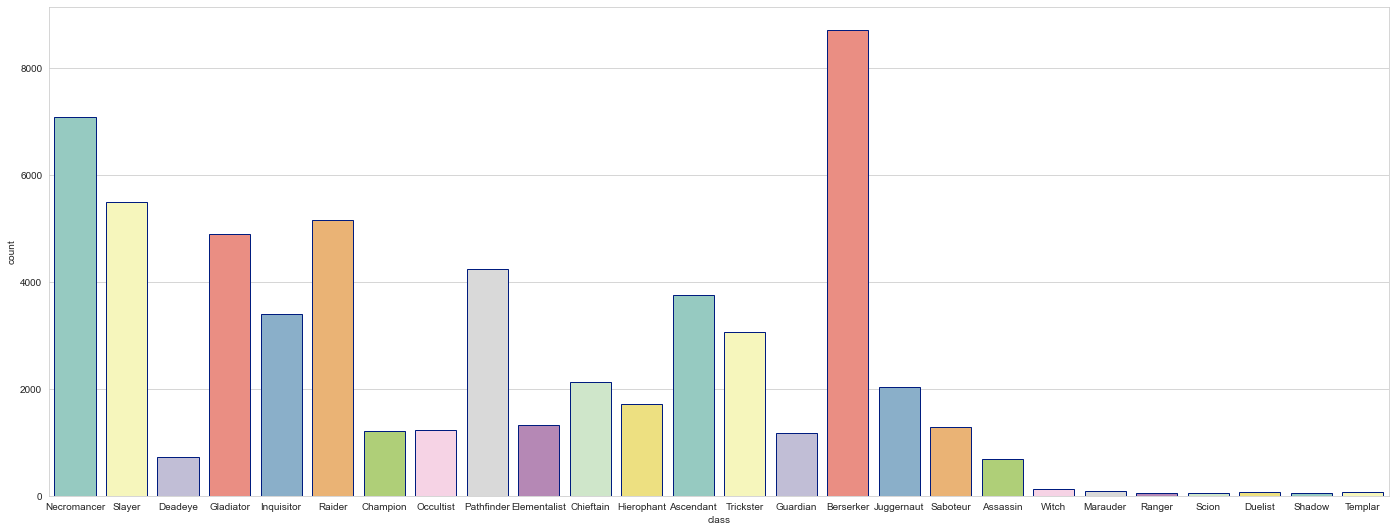

In [28]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'class',
              palette="Set3", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

### class- rank 

In [29]:
# 논 하드코어 모드의 클래스별 사람 수

pivot_countuser_class_non_hc = non_hc.pivot_table(values = 'id', columns = 'class', aggfunc = 'count')
pivot_countuser_class_non_hc

class,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Duelist,Elementalist,Gladiator,Guardian,...,Pathfinder,Raider,Ranger,Saboteur,Scion,Shadow,Slayer,Templar,Trickster,Witch
id,1740,382,5003,388,747,359,10,734,1968,415,...,3664,3429,13,584,8,10,3007,6,1166,21


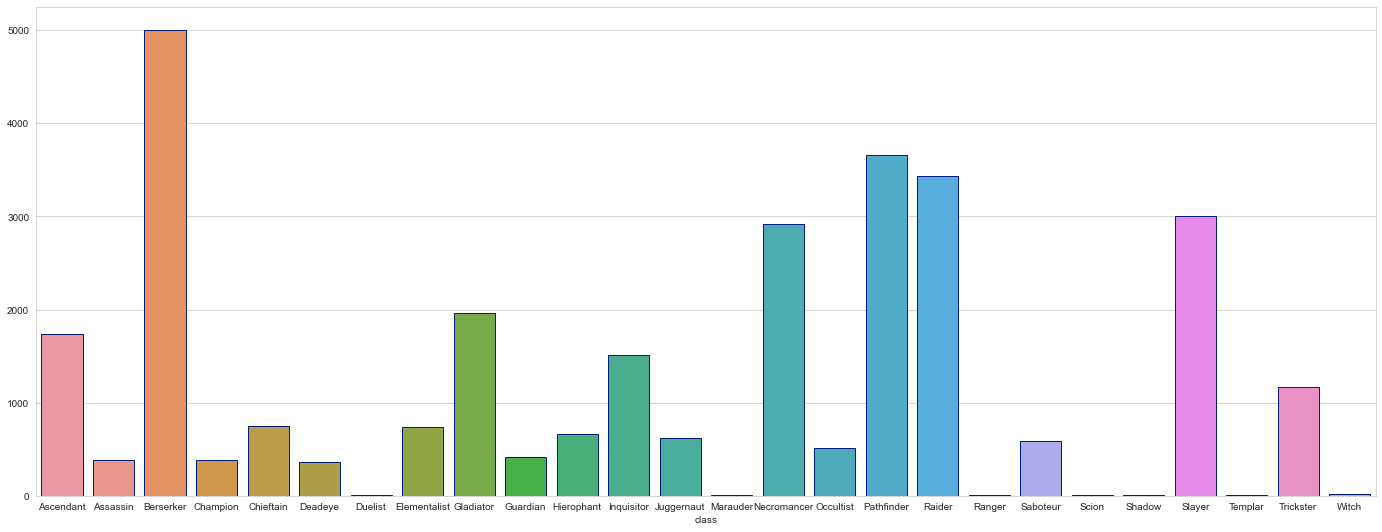

In [30]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.barplot(data = pivot_countuser_class_non_hc,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

In [31]:
# 논 하드코어 모드의 클래스별 평균 랭크

pivot_meanrank_class_non_hc = non_hc.pivot_table(values = 'rank', columns = 'class', aggfunc = 'mean')
pivot_meanrank_class_non_hc

class,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Duelist,Elementalist,Gladiator,Guardian,...,Pathfinder,Raider,Ranger,Saboteur,Scion,Shadow,Slayer,Templar,Trickster,Witch
rank,7612.296552,8901.065445,7564.691385,7906.96134,7683.568942,8455.437326,11010.9,8273.97139,6938.378049,7261.098795,...,6786.856987,7419.961796,11074.615385,7846.900685,11817.5,11110.0,7428.542734,12859.5,7406.801887,11735.666667


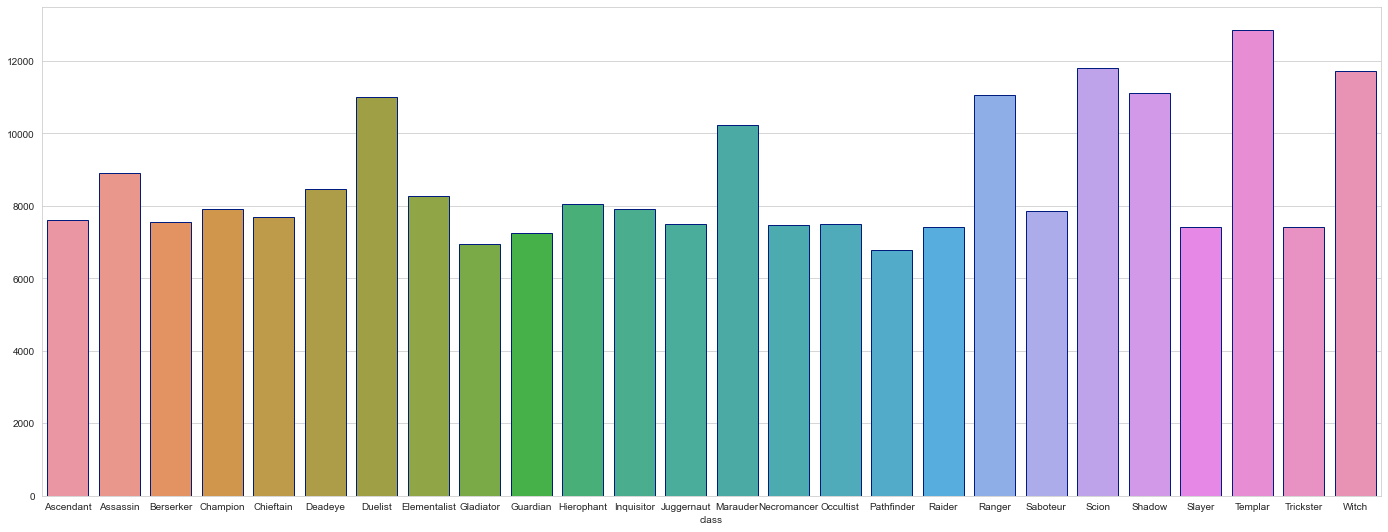

In [32]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.barplot(data = pivot_meanrank_class_non_hc,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

In [33]:
# 논 하드코어 모드의 클래스별 평균 레벨

pivot_meanlevel_class_non_hc = non_hc.pivot_table(values = 'level', columns = 'class', aggfunc = 'mean')
pivot_meanlevel_class_non_hc

class,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Duelist,Elementalist,Gladiator,Guardian,...,Pathfinder,Raider,Ranger,Saboteur,Scion,Shadow,Slayer,Templar,Trickster,Witch
level,88.32069,84.973822,90.13392,86.569588,87.767068,84.409471,78.2,85.348774,87.881606,93.746988,...,95.333788,90.25401,78.153846,86.501712,77.125,78.1,90.626538,75.666667,85.388508,77.285714


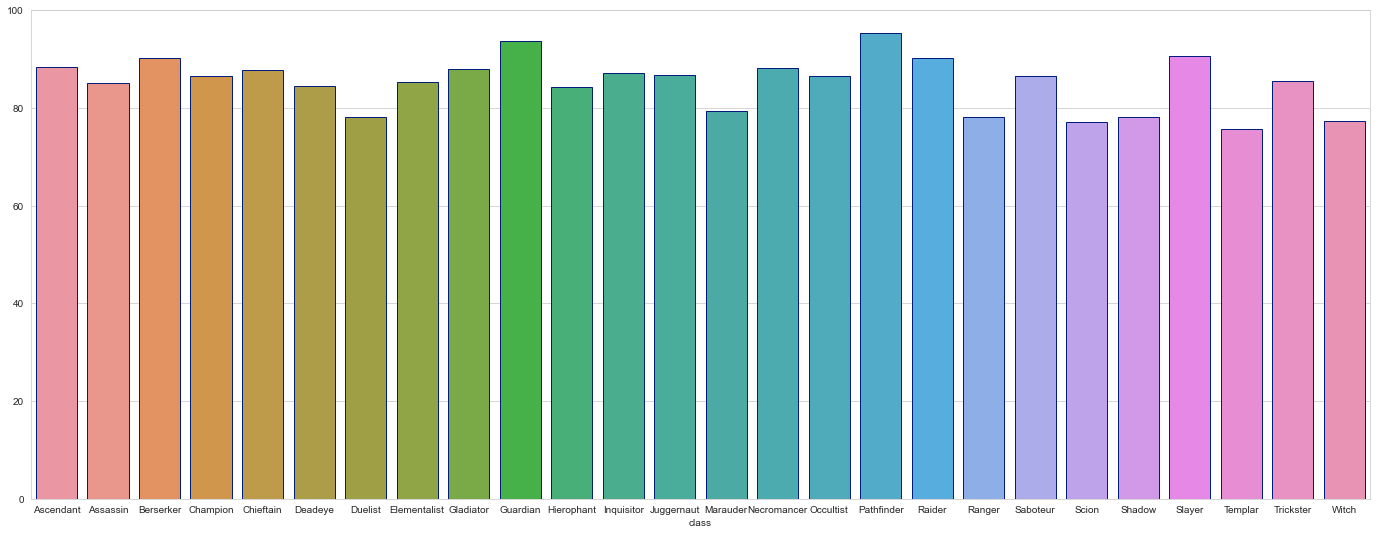

In [34]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.barplot(data = pivot_meanlevel_class_non_hc,
            edgecolor=sns.color_palette("dark", 1))
plt.show()

## rank

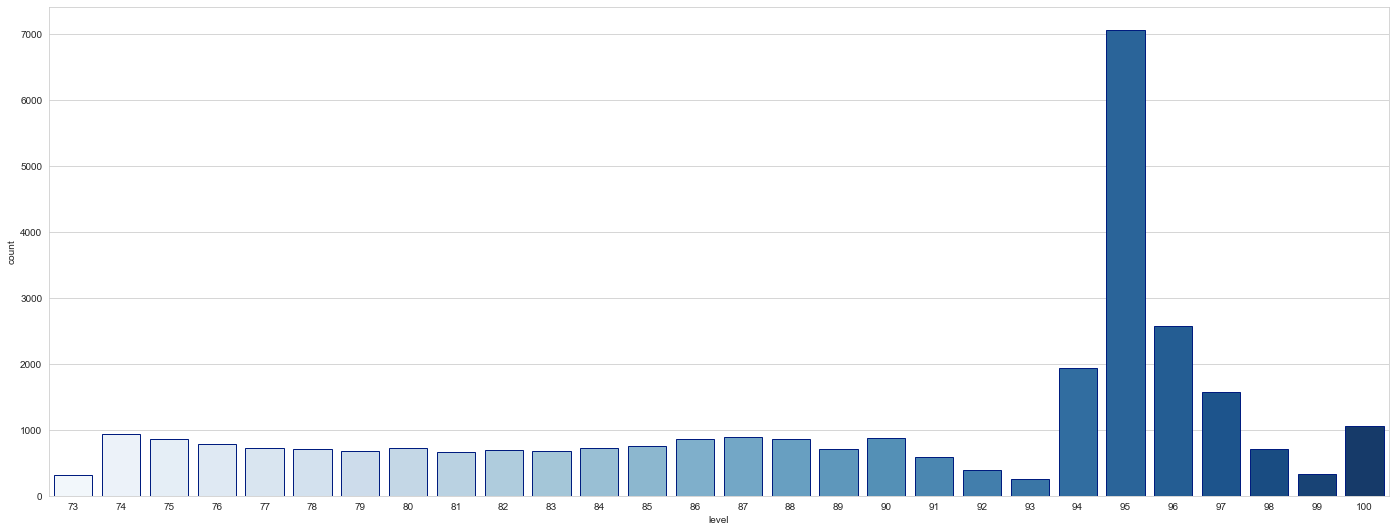

In [35]:
plt.rcParams["figure.figsize"] = (24, 9)
sns.set_style('whitegrid')
sns.countplot(data = non_hc, x = 'level', 
              palette="Blues", edgecolor=sns.color_palette("dark", 1)) #palette = Accent
plt.show()

## exp

경험치는 연속형 변수이기 때문에 구간을 나누어주어서 간단하게분포를 보려한다.

array([[<AxesSubplot:title={'center':'experience'}>]], dtype=object)

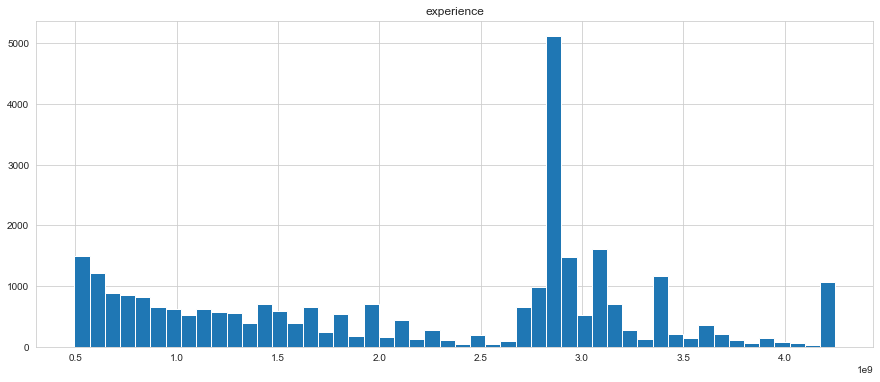

In [36]:
non_hc.hist(column = 'experience', figsize=(15,6), bins=50)

## online

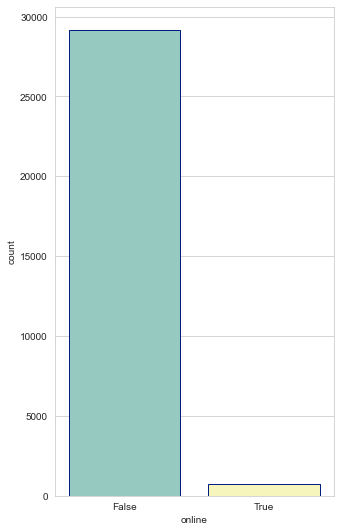

In [37]:
plt.rcParams["figure.figsize"] = (5, 9)
sns.set_style('whitegrid')
sns.countplot(data = non_hc, x = 'online', 
              palette="Set3", edgecolor=sns.color_palette("dark", 1))
plt.show()

online 자체의 큰 의미는 있어보이지 않지만, 데이터를 얻었을 당시 랭커들 중에는 접속중이지 않은 사람이 훨씬 많다. 그럼 전체 중 접속률은?

In [38]:
non_hc['online'].value_counts()/sum(non_hc['online'].value_counts())*100

False    97.561791
True      2.438209
Name: online, dtype: float64

non_hc mode's rankers online rate = 2.4%